## Pandas Group By

The groupby method in Pandas is used to split a DataFrame into groups based on the values in one or more columns. It creates a GroupBy object, which you can then apply aggregate functions (such as mean, sum, or count) to obtain summary statistics for each group. The resulting data structure is a new DataFrame with the group labels as the index and the aggregated values as columns.

In [11]:
import pandas as pd
import numpy as np
people_df=pd.read_csv("data/people.csv")
import 

In [12]:
people_df

,name,age,country
0,Pol,22,ES
1,Javi,20,ES
2,Maria,23,AR
3,Anna,24,FR
4,Anna,24,UK
5,Javi,30,MA
6,Dog,2,XX


In [13]:
people_df.groupby("name").mean()

,age
name,
Anna,24.0
Dog,2.0
Javi,25.0
Maria,23.0
Pol,22.0


In [14]:
people_df.groupby("name")

In [15]:
people_df.groupby("name").groups

{'Anna': [3, 4], 'Dog': [6], 'Javi': [1, 5], 'Maria': [2], 'Pol': [0]}

In [16]:
people_df

,name,age,country
0,Pol,22,ES
1,Javi,20,ES
2,Maria,23,AR
3,Anna,24,FR
4,Anna,24,UK
5,Javi,30,MA
6,Dog,2,XX


In [17]:
people_df.groupby(["country","name"]).mean()

age
country name       
AR      Maria  23.0
ES      Javi   20.0
        Pol    22.0
FR      Anna   24.0
MA      Javi   30.0
UK      Anna   24.0
XX      Dog     2.0

The groups created by the groupby method in Pandas are groups of rows in the original DataFrame that have the same values in the columns specified for grouping. Each group is represented as a unique tuple of values in the specified columns.

In [18]:
people_df.groupby(["country","name"]).groups

{('AR', 'Maria'): [2], ('ES', 'Javi'): [1], ('ES', 'Pol'): [0], ('FR', 'Anna'): [3], ('MA', 'Javi'): [5], ('UK', 'Anna'): [4], ('XX', 'Dog'): [6]}

In [20]:
def groups_avg(grps):
    return grps.mean() + 15

In [28]:
people_df.groupby("name")[["age"]].mean()

,age
name,
Anna,24.0
Dog,2.0
Javi,25.0
Maria,23.0
Pol,22.0


In [ ]:
people_df.groupby("name")["age"].apply(lambda grps:grps.mean() +15)

In [31]:
people_df.groupby("name").apply(np.sum)

,age,country
name,,
Anna,2,2
Dog,1,1
Javi,2,2
Maria,1,1
Pol,1,1


In [37]:
min(["pablo","esra","rodrigo"])

'esra'

In [32]:
people_df.groupby("name").apply(lambda gp:gp.max() )

,name,age,country
name,,,
Anna,Anna,24,UK
Dog,Dog,2,XX
Javi,Javi,30,MA
Maria,Maria,23,AR
Pol,Pol,22,ES


The agg method in Pandas is used to apply one or more aggregate functions to the groups created by the groupby method. The agg method takes as input a dictionary mapping column names to aggregate functions or a single aggregate function applied to all columns. The result is a new DataFrame where the columns represent the aggregated values, and the index is the grouping columns.

In [38]:
people_df.groupby('name').agg(['max',"min"])

age     country    
      max min     max min
name                     
Anna   24  24      UK  FR
Dog     2   2      XX  XX
Javi   30  20      MA  ES
Maria  23  23      AR  AR
Pol    22  22      ES  ES

In [39]:
people_df

,name,age,country
0,Pol,22,ES
1,Javi,20,ES
2,Maria,23,AR
3,Anna,24,FR
4,Anna,24,UK
5,Javi,30,MA
6,Dog,2,XX


In [40]:
people_df.groupby("country").agg({"age":["count","mean","min"],"name":"max"})

age             name
        count  mean min    max
country                       
AR          1  23.0  23  Maria
ES          2  21.0  20    Pol
FR          1  24.0  24   Anna
MA          1  30.0  30   Javi
UK          1  24.0  24   Anna
XX          1   2.0   2    Dog

### - Splitting
- splitting Data Frame into sub groups by key value or values
- equal to "group By" in SQL. 

### - Applying
   - Aggregation
       - applying one or multiple functions in to the items within each subgroup.
   - Transformation
        - broadcasting the results into the original data frame
   - Filteration
        - equivelant to HAVING in SQL
        
### - Combining
    - combining the results to fit into the data pipeline and/or delivers the insights

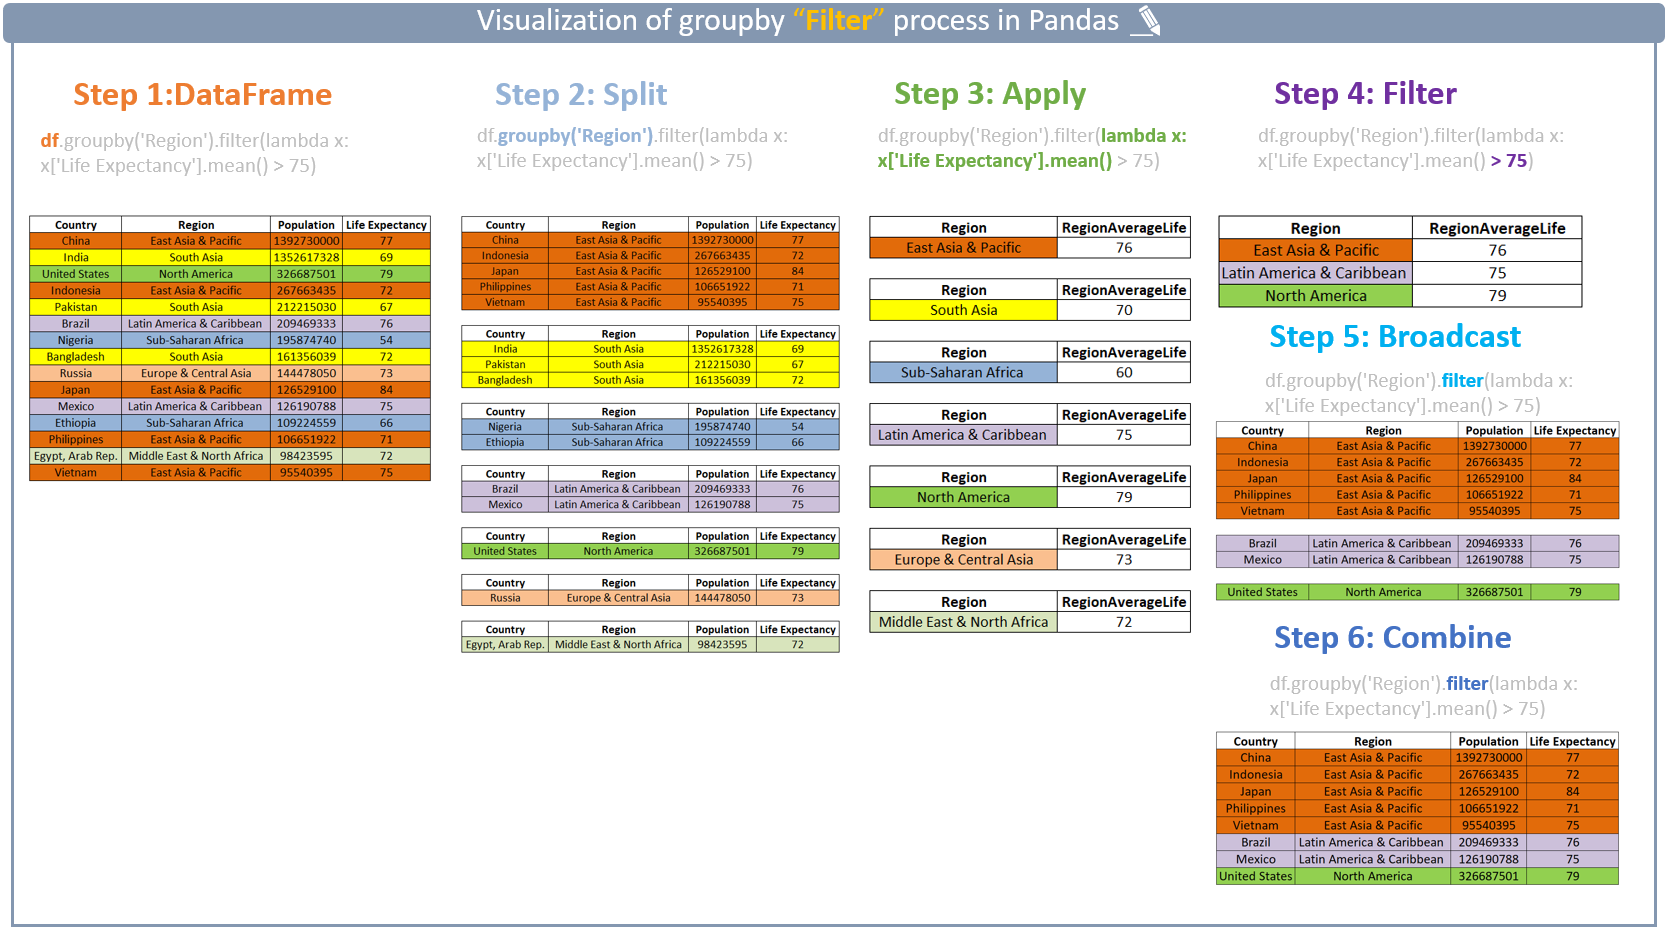

In [44]:
from IPython import display
display.Image("res/grouping.png")

source:https://towardsdatascience.com/aggregation-transform-filter-how-and-when-to-use-them-31ed7eb88d2e

In [45]:
df=pd.read_csv("data/life_expectancy_countries.csv")
df

,Country,Region,Population,Life Expectancy
0,China,East Asia & Pacific,1392730000,77
1,India,South Asia,1352617328,69
2,United States,North America,326687501,79
3,Indonesia,East Asia & Pacific,267663435,72
4,Pakistan,South Asia,212215030,67
5,Brazi,Latin America & Caribbean,209469333,76
6,Nigeria,Sub-Saharan Africa,195874740,54
7,Bangladesh,South Asia,161356039,72
8,Russia,Europe & Central Asia,144478050,73
9,Japan,East Asia & Pacific,126529100,84


In [49]:
df.groupby("Region")["Life Expectancy"].mean()>75

Region
East Asia & Pacific            True
Europe & Central Asia         False
Latin America & Caribbean      True
Middle East & North Africa    False
North America                  True
South Asia                    False
Sub-Saharan Africa            False
Name: Life Expectancy, dtype: bool

In [48]:
df.groupby('Region').filter(lambda x: x['Life Expectancy'].mean()>75).sort_values(by="Region")

,Country,Region,Population,Life Expectancy
0,China,East Asia & Pacific,1392730000,77
3,Indonesia,East Asia & Pacific,267663435,72
9,Japan,East Asia & Pacific,126529100,84
12,Philippines,East Asia & Pacific,106651922,71
14,Vietnam,East Asia & Pacific,95540395,75
5,Brazi,Latin America & Caribbean,209469333,76
10,Mexico,Latin America & Caribbean,126190788,75
2,United States,North America,326687501,79
